# Heart Attack prediction

## importing libraries ##

In [1]:
import os
import sys
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


from modules.preprocessing import missing_values_columns
from modules.preprocessing import encode_categorical_features
from modules.preprocessing import standardize
from modules.visualization import visualize_hist
from modules.visualization import heatmap
from modules.visualization import feature_importance_hist

## reading data ##

In [2]:
data_path='datasets/heart.csv'
data=pd.read_csv(data_path)

data.head(10)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


## data cleaning ##

In [3]:

missing_values=missing_values_columns(data)

print(f'missing values per column:\n{missing_values}')

missing values per column:
{'age': 0, 'sex': 0, 'cp': 0, 'trtbps': 0, 'chol': 0, 'fbs': 0, 'restecg': 0, 'thalachh': 0, 'exng': 0, 'oldpeak': 0, 'slp': 0, 'caa': 0, 'thall': 0, 'output': 0}


fortunately, there are no missing values in the dataset

## explorative data analysis ##


**show the mean values grouped by age and sex of cholesterol, blood pressure, maximum rate achieved**

In [4]:
sub_age_sex=data.groupby(['age','sex']).agg(Mean_cholesterol=('chol','mean'),Mean_blood_pressure=('trtbps','mean'),Mean_max_heart_rate_achieved=('thalachh','mean'))

In [5]:
print(sub_age_sex.head(20))

         Mean_cholesterol  Mean_blood_pressure  Mean_max_heart_rate_achieved
age sex                                                                     
29  1          204.000000           130.000000                    202.000000
34  0          210.000000           118.000000                    192.000000
    1          182.000000           118.000000                    174.000000
35  0          183.000000           138.000000                    182.000000
    1          224.000000           122.666667                    153.333333
37  0          215.000000           120.000000                    170.000000
    1          250.000000           130.000000                    187.000000
38  1          193.666667           132.000000                    176.000000
39  0          209.500000           116.000000                    165.500000
    1          270.000000           129.000000                    161.000000
40  1          196.333333           134.000000                    157.666667

In [6]:
print(sub_age_sex.tail(20))

         Mean_cholesterol  Mean_blood_pressure  Mean_max_heart_rate_achieved
age sex                                                                     
62  1          246.750000           124.500000                    122.000000
63  0          264.000000           131.400000                    162.000000
    1          251.000000           136.250000                    143.250000
64  0          313.666667           150.000000                    136.333333
    1          257.571429           134.000000                    131.571429
65  0          317.750000           151.250000                    142.500000
    1          240.250000           125.750000                    149.750000
66  0          244.000000           158.000000                    143.666667
    1          247.000000           138.000000                    135.250000
67  0          354.666667           124.333333                    158.000000
    1          252.833333           129.500000                    124.333333

## data visualization ##

**display the histogram of the distribution of each feature**

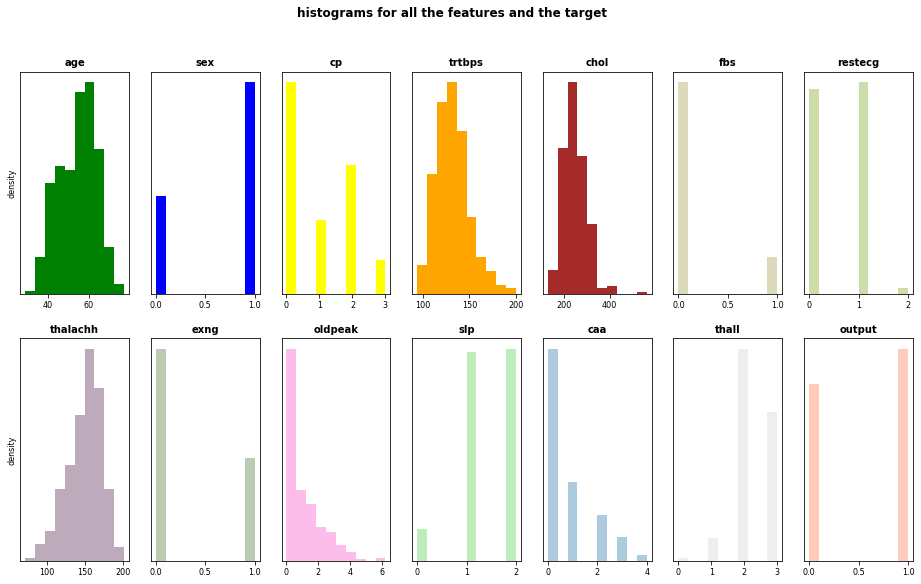

In [7]:
cols=list(data.columns)

visualize_hist(data,cols)

**correlation matrix among numerical variables**

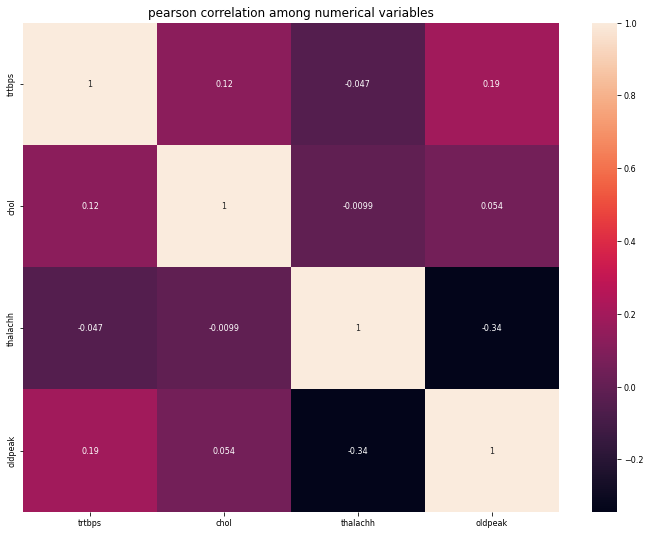

In [8]:
numerical_columns=['trtbps','chol','thalachh','oldpeak']

heatmap(data,numerical_columns)

there aren't strong correlations among numerical variables, therefore, there is no multicollinearity among these features

**association among nominal variables**

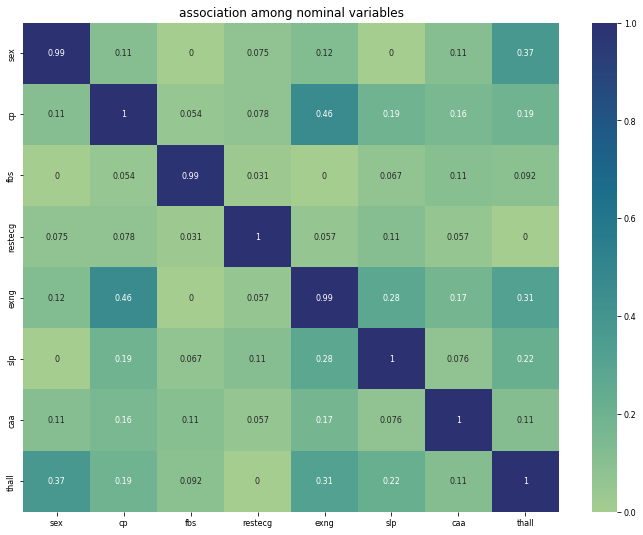

In [9]:
nominal_columns=['sex','cp','fbs','restecg','exng','slp','caa','thall']

heatmap(data,nominal_columns,categorical=True)

## feature transformation ##

**encoding the categorical features into one hot vectors**

In [10]:
categorical_columns=['age','sex','cp','fbs','restecg','exng','slp','caa','thall']
data=encode_categorical_features(data,categorical_columns)

**standardize the numerical variables**

In [11]:
numerical_columns=['trtbps','chol','thalachh','oldpeak']

data=standardize(data,numerical_columns)

## separate features and labels into train and test set ##

In [12]:
data=data.sample(frac=1,random_state=42) #shuffling data

In [13]:

X=data.iloc[:,:-1]
print('shape of X',X.shape)
y=data.iloc[:,-1]
print('shape of y',y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


shape of X (303, 70)
shape of y (303,)


In [14]:
X_train.shape

(242, 70)

In [15]:
X_test.shape

(61, 70)

## binary classification using pca and logistic regression ##

In [16]:
pipe=Pipeline(steps=[('reduction',PCA()),('clf',LogisticRegression())])

**grid search**

In [17]:
param_dict={'reduction__n_components':[5,10,20,30],'clf__C':[1,5,10,20]}

grid=GridSearchCV(estimator=pipe,param_grid=param_dict,scoring='accuracy',verbose=2)

grid.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END ................clf__C=1, reduction__n_components=5; total time=   0.0s
[CV] END ................clf__C=1, reduction__n_components=5; total time=   0.0s
[CV] END ................clf__C=1, reduction__n_components=5; total time=   0.0s
[CV] END ................clf__C=1, reduction__n_components=5; total time=   0.0s
[CV] END ................clf__C=1, reduction__n_components=5; total time=   0.0s
[CV] END ...............clf__C=1, reduction__n_components=10; total time=   0.0s
[CV] END ...............clf__C=1, reduction__n_components=10; total time=   0.0s
[CV] END ...............clf__C=1, reduction__n_components=10; total time=   0.0s
[CV] END ...............clf__C=1, reduction__n_components=10; total time=   0.0s
[CV] END ...............clf__C=1, reduction__n_components=10; total time=   0.0s
[CV] END ...............clf__C=1, reduction__n_components=20; total time=   0.0s
[CV] END ...............clf__C=1, reduction__n_c

GridSearchCV(estimator=Pipeline(steps=[('reduction', PCA()),
                                       ('clf', LogisticRegression())]),
             param_grid={'clf__C': [1, 5, 10, 20],
                         'reduction__n_components': [5, 10, 20, 30]},
             scoring='accuracy', verbose=2)

In [18]:
print('the best accuracy score is:',grid.best_score_)

print('the best parameters are:',grid.best_params_)

the best accuracy score is: 0.9958333333333332
the best parameters are: {'clf__C': 20, 'reduction__n_components': 30}


**use the best parameters found in the grid search**

In [19]:
pipe.set_params(reduction__n_components=30,clf__C=20)

pipe.fit(X_train,y_train)

preds=pipe.predict(X_test)

accuracy=accuracy_score(y_test,preds)

print(f'accuracy score for the test set is: {accuracy}')

accuracy score for the test set is: 0.9672131147540983


**visualize the contribution of the features into the logistic model**

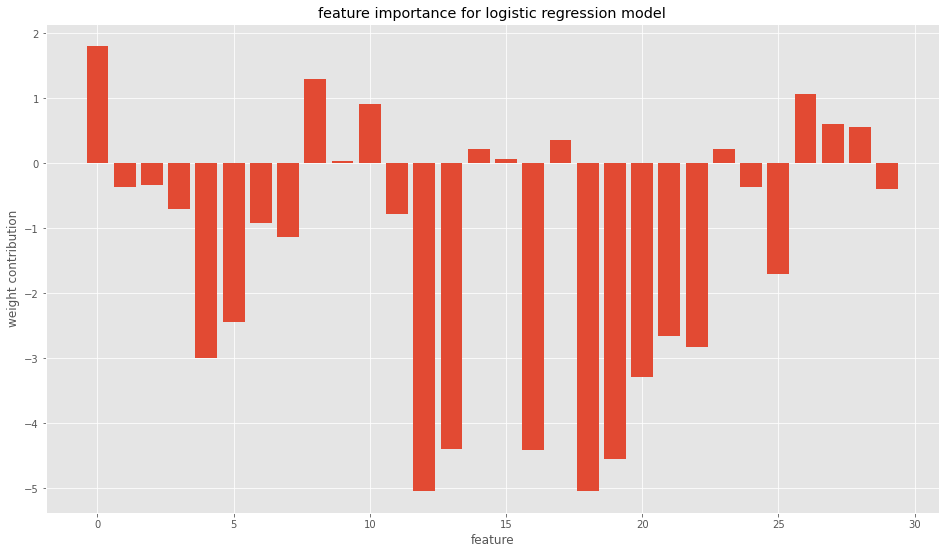

In [20]:
coefficients=feature_importance_hist(pipe)

In [21]:
print(np.sort(coefficients)) #weights in ascending order

[-5.03410094 -5.0339039  -4.55138917 -4.41493223 -4.39471618 -3.2836543
 -2.99967919 -2.83386686 -2.65304195 -2.44759527 -1.71048117 -1.13244138
 -0.91947074 -0.78138541 -0.71055595 -0.39970553 -0.37273257 -0.36917121
 -0.33223613  0.03940196  0.06796338  0.21763976  0.2243116   0.35609506
  0.55354963  0.59567777  0.90197693  1.06542152  1.29945072  1.80328341]
